In [3]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import re
import csv
import json
import pandas as pd
import urllib.request
import re
import nltk
import networkx as nx
import matplotlib.pyplot as plt
import random
import statistics
import os
import numpy as np
from networkx.algorithms.community.centrality import girvan_newman
import networkx.algorithms.community as nx_comm
import itertools
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk import FreqDist 

First, we import the LabMT wordlist, and show the first 5 rows of the dataframe.

In [4]:
df = pd.read_csv("Data_Set_S1.txt", sep="\t") 
# sep='' in the context of a function call sets the named argument sep to an empty string. 
df.head()

,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
0,laughter,1,8.50,0.9313,3600,--,--,1728
1,happiness,2,8.44,0.9723,1853,2458,--,1230
2,love,3,8.42,1.1082,25,317,328,23
3,happy,4,8.30,0.9949,65,1372,1313,375
4,laughed,5,8.26,1.1572,3334,3542,--,2332


Then we get the happiness dictionary:

In [5]:
happiness_dict = dict(zip(df['word'],df['happiness_average']))
happiness_dict

{'laughter': 8.5,
 'happiness': 8.44,
 'love': 8.42,
 'happy': 8.3,
 'laughed': 8.26,
 'laugh': 8.22,
 'laughing': 8.2,
 'excellent': 8.18,
 'laughs': 8.18,
 'joy': 8.16,
 'successful': 8.16,
 'win': 8.12,
 'rainbow': 8.1,
 'smile': 8.1,
 'won': 8.1,
 'pleasure': 8.08,
 'smiled': 8.08,
 'rainbows': 8.06,
 'winning': 8.04,
 'celebration': 8.02,
 'enjoyed': 8.02,
 'healthy': 8.02,
 'music': 8.02,
 'celebrating': 8.0,
 'congratulations': 8.0,
 'weekend': 8.0,
 'celebrate': 7.98,
 'comedy': 7.98,
 'jokes': 7.98,
 'rich': 7.98,
 'victory': 7.98,
 'christmas': 7.96,
 'free': 7.96,
 'friendship': 7.96,
 'fun': 7.96,
 'holidays': 7.96,
 'loved': 7.96,
 'loves': 7.96,
 'loving': 7.96,
 'beach': 7.94,
 'hahaha': 7.94,
 'kissing': 7.94,
 'sunshine': 7.94,
 'beautiful': 7.92,
 'delicious': 7.92,
 'friends': 7.92,
 'funny': 7.92,
 'outstanding': 7.92,
 'paradise': 7.92,
 'sweetest': 7.92,
 'vacation': 7.92,
 'butterflies': 7.92,
 'freedom': 7.9,
 'flower': 7.88,
 'great': 7.88,
 'sunlight': 7.88,
 

By doing this, we can construct a function to calculate the sentiment value. We made some small tricks to deal with the data in the function, fistly we use regular expression to get all the words and then only get the lower words. At the same time, we also deleted some garbled characters, some hyphens and useless field information.

In [6]:
def calculate_sentiment_value(file):
    with open(file, "r",encoding='UTF-8') as f: 
        a = f.read()
    f.close()
    b = re.split(r'\W+', a)      
    c = [word.lower() for word in b if len(word) > 0]   
    
    score = 0
    length_of_word = len(c)
    for i in c:
        if i in happiness_dict:
            score = score + happiness_dict[i]
        else:
            length_of_word = length_of_word - 1
            continue
    if length_of_word == 0:
        return None
    sentiment_value = score/length_of_word
    return sentiment_value

We design a fucntion to locate all the files in certain folder and return all the file name. (Reference: https://zhuanlan.zhihu.com/p/98124110)

In [7]:
def findAllFile(base):                           
    for root, ds, fs in os.walk(base):
        for f in fs:
            if f.endswith('.txt'):
                fullname = os.path.join(root, f)
                yield fullname

def main():
    base = os.getcwd() + "\\wikitexts\\wikitexts"
    file_of_movie_name = []
    for i in findAllFile(base):
        file_of_movie_name.append(i)
    return file_of_movie_name

file_of_movie_name = main()    


Let's see all the files' name in our folder:

In [8]:
file_of_movie_name

['D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\(500)_Days_of_Summer_(2009).txt',
 'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\...All_the_Marbles_(1981).txt',
 'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\...And_Justice_for_All_(1979).txt',
 'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\00_Schneider_-_Jagd_auf_Nihil_Baxter_(1994).txt',
 'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\1-900_(06)_(1994).txt',
 'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\10,000_BC_(2008).txt',
 'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\100_Girls_(2000).txt',
 'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\10

We build a new list called 'sentiment_value_movie_list' to record all the sentimental values for all the movies we need to deal with.

In [9]:
sentiment_value_movie_list = []  
sentiment_value_movie_list

[]

We make the sentimental calculation, namely using the 'calculate_sentiment_value Function' to calculate each value for each txt file.

In [10]:
for movie in file_of_movie_name:
    sentiment_value_movie_list.append(calculate_sentiment_value(movie))   

We get the sentimental value list:

In [11]:
sentiment_value_movie_list

[5.5868299925761225,
 5.481466147101761,
 5.433594153052416,
 5.361093333333334,
 5.532430769230766,
 5.481119828815948,
 5.440544982698953,
 5.520453172205439,
 5.55894803548794,
 5.579749501850238,
 5.451925249891291,
 5.621657142857146,
 5.516355685131166,
 5.468336215842222,
 5.385072992700687,
 5.386473829201103,
 5.586298262548224,
 5.385149425287354,
 5.531088701378871,
 5.555049019607831,
 5.544174283973147,
 5.502986913009999,
 5.418167938931295,
 5.358011257035552,
 5.394777927321616,
 5.600613885505486,
 5.434320879120842,
 5.3276076217360355,
 5.4567028199566145,
 5.404188034188034,
 5.40301838610825,
 5.469481608948141,
 5.540518064076277,
 5.412122448979547,
 5.565085214186975,
 5.390813559322006,
 5.598640828245261,
 5.510189100911134,
 5.350042553191441,
 5.438496240601495,
 5.427451811873531,
 5.511653333333293,
 5.348604060913681,
 5.3826683291770285,
 5.411752026529091,
 5.589233226837015,
 5.347349397590324,
 5.467862531433351,
 5.432472406180946,
 5.440475432663597

Let's explore the sentimental value list more deeply, and figure out whether there is any 'None' values. 

In [12]:
for i in range(len(sentiment_value_movie_list)):
    if sentiment_value_movie_list[i] == None:
        print('There exists None value,the number is:',i)

So we use filter() function, to delete all the None values in the list:

In [13]:
cleaned_sentiment_value_movie_list = list(filter(None, sentiment_value_movie_list)) 

Verify the result, yes, it is right!

In [14]:
len(cleaned_sentiment_value_movie_list) - len (sentiment_value_movie_list)

0

Let's go deeper into the values of the 'cleaned_sentiment_value_movie_list', for example we calculate the mean value of the list:

In [15]:
mean_value_sentiment = sum(cleaned_sentiment_value_movie_list)/len(cleaned_sentiment_value_movie_list)  
mean_value_sentiment

5.484366940871147

Let's draw the distribution graph to show the characters of the sentimental values. (To draw this beautiful graph, I asked one of my friends and borrowed a bit from his code.)

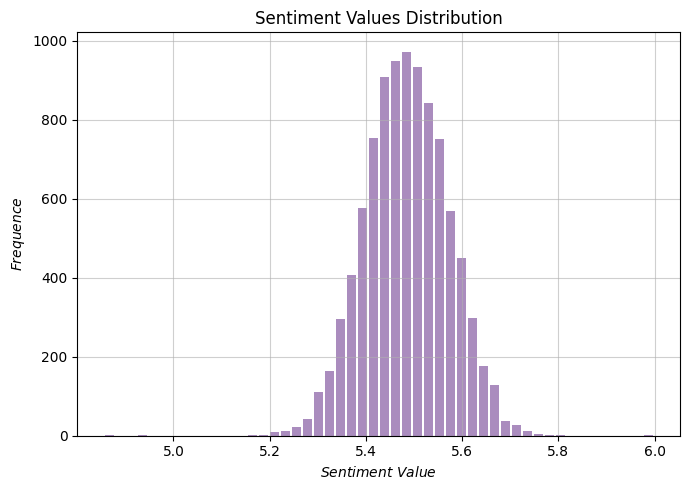

In [16]:
plt.figure(figsize=(7, 5), dpi=100)
c = [(120,80,150), (170,140,190), (115,250,80)] 
c = [(lambda color: '#%02x%02x%02x' % color)(rgb) for rgb in c] 
plt.hist(cleaned_sentiment_value_movie_list, bins=50, color=c[1], rwidth=0.8)
plt.grid(alpha=0.6)
plt.title('Sentiment Values Distribution')
plt.xlabel('$Sentiment\ Value$')
plt.ylabel('$Frequence$')
plt.tight_layout()
plt.show()

We can see from the figure that the distribution of this sentiment value is like a normal distribution. 

Let's draw a graph to illustrate the mean values of the sentimental values in every single year:

In [31]:
keys = file_of_movie_name
values = sentiment_value_movie_list
sentiment_value_movie__dict = dict(zip(keys, values))

In [32]:
sentiment_value_movie__dict

{'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\(500)_Days_of_Summer_(2009).txt': 5.5868299925761225,
 'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\...All_the_Marbles_(1981).txt': 5.481466147101761,
 'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\...And_Justice_for_All_(1979).txt': 5.433594153052416,
 'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\00_Schneider_-_Jagd_auf_Nihil_Baxter_(1994).txt': 5.361093333333334,
 'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\1-900_(06)_(1994).txt': 5.532430769230766,
 'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\10,000_BC_(2008).txt': 5.481119828815948,
 'D:\\LEARNING\\BA\\2022.9-2022.12\\Social graph 12.7 deadline\\Project 2\\wikitexts\\wikitexts\\100_Gir

In [60]:
def get_average_of_movie_sentimental_score_in_certain_year(year):
    count = 0
    score = 0
    for i in file_of_movie_name:
        a = re.search(r"\(([0-9]*?)\)",i)
        if (a is not None):
            #if movie is from year, update count
            if (int(a.group(1)) == year):
                score = score + sentiment_value_movie__dict[i]
                count = count + 1
    if (count == 0):
        return None
    return score/count

get_average_of_movie_sentimental_score_in_certain_year(2000)


#for i in range(1915,2019)

5.478879861677051

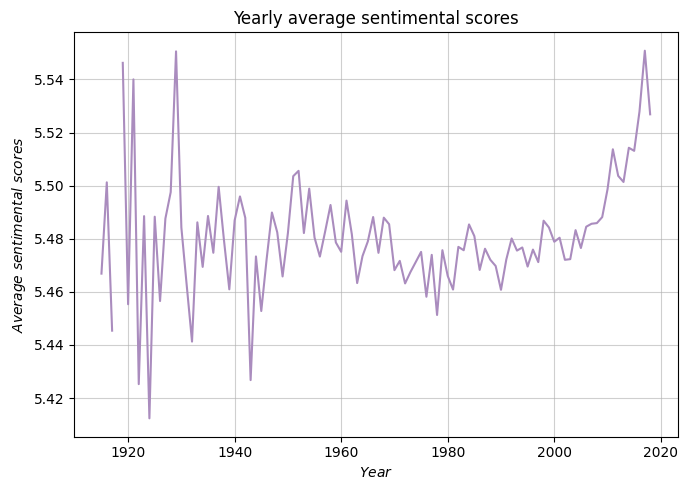

In [62]:
z = []
q = []

for i in range(1915,2019):
    q.append(get_average_of_movie_sentimental_score_in_certain_year(i))
    z.append(i)

plt.figure(figsize=(7, 5), dpi=100)
c = [(120,80,150), (170,140,190), (115,250,80)] 
c = [(lambda color: '#%02x%02x%02x' % color)(rgb) for rgb in c] 
plt.plot(z,q, color=c[1])
plt.grid(alpha=0.6)
plt.title('Yearly average sentimental scores')
plt.xlabel('$Year$')
plt.ylabel('$Average\ sentimental\ scores$')
plt.tight_layout()
plt.show()


Significance tests can often tell us whether an observation is valid, for example a hypothesis test that detects the difference in the means of two sets of samples can tell us whether the means of the two sets of samples are equal (or which mean is greater). In our experiments, we often get some small sample results due to various problems (time, funds, manpower, material resources). If we want to know what the overall results of these small samples look like, we need to use a permutation test.

So let's do a small permutation test to investigate whether the old movies have a higher averge value for sentiment than a similarly sized set of randomly selected movies. 

We write like this:

H1: Old movies have a higher averge value for sentiment than a similarly sized set of randomly selected movies.

We define old movies are from the year 1960 or earlier.

In [65]:
old_movie_value = []
for i in range(1915,1961):
    old_movie_value.append(get_average_of_movie_sentimental_score_in_certain_year(i))

In [67]:
for i in old_movie_value:
    if i == None:
        old_movie_value.remove(i)

In [71]:
non_old_movie_value = []
for i in range(1961,2019):
    non_old_movie_value.append(get_average_of_movie_sentimental_score_in_certain_year(i))

In [72]:
for i in non_old_movie_value:
    if i == None:
        non_old_movie_value.remove(i)

In [76]:
mean_old_movie_value = sum(old_movie_value)/len(old_movie_value)
mean_non_old_movie_value = sum(non_old_movie_value)/len(non_old_movie_value)

In [77]:
Statistics = mean_old_movie_value - mean_non_old_movie_value
print('statistics = ',Statistics)

statistics =  -0.0018949510645764889


In [78]:
data = np.concatenate((old_movie_value,non_old_movie_value))
Permuted_data = np.random.permutation(data)
sample1 = Permuted_data[:len(old_movie_value)]
sample2 = Permuted_data[len(old_movie_value):]

difference_of_the_sample = np.mean(sample1) - np.mean(sample2)
print(difference_of_the_sample)

-0.0014431097722704678


In [79]:
results = []
data = np.concatenate((old_movie_value,non_old_movie_value))
for i in range(1000):
    Permuted_data = np.random.permutation(data)
    sample1 = Permuted_data[:len(non_old_movie_value)]
    sample2 = Permuted_data[len(non_old_movie_value):]
    difference_of_the_sample = np.mean(sample1) - np.mean(sample2)
    results.append(difference_of_the_sample)

In [83]:
count = 0
for i in results:
    if i > Statistics:
        count = count + 1
print(count)    # 0???????? P value = 0
P_value = (count+1)/(999+1)
P_value

665


0.666

In [ ]:
#所以我们不能否定原假设。